In [23]:
import tifffile
import numpy as np
from skimage.filters import gaussian
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = tifffile.memmap('/mnt/HD-LSDF/Xenopus/2021_11_Xenopus/Vergleichsmessungen_NN/Xenopus_13_3p125_ms_exp_750_proj/slices.tif')

In [3]:
img.shape

(2016, 2016, 2016)

In [10]:
slc = img[1000][750:1250, 500:1000]

(array([8.0000e+00, 1.5900e+02, 2.6840e+03, 2.0893e+04, 6.8982e+04,
        9.2745e+04, 5.1478e+04, 1.1757e+04, 1.2280e+03, 6.6000e+01]),
 array([-0.00268625, -0.00217029, -0.00165433, -0.00113836, -0.0006224 ,
        -0.00010644,  0.00040953,  0.00092549,  0.00144145,  0.00195742,
         0.00247338], dtype=float32),
 <BarContainer object of 10 artists>)

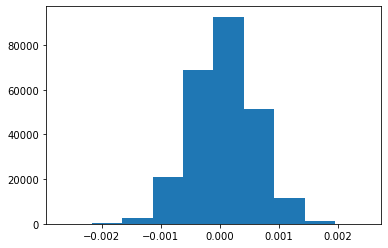

In [12]:
plt.hist(slc.flatten())

In [14]:
slc_clp = np.clip(slc, np.percentile(slc.flatten(), 1), np.percentile(slc.flatten(), 99))

In [26]:
slc_clp_os = gaussian(slc_clp, 7)

In [21]:
slc_resc = slc_clp - slc_clp.min()
slc_resc = slc_resc / slc_resc.max()
slc_resc *= 255
slc_resc = slc_resc.astype(np.uint8)

In [22]:
slc_resc_1 = np.copy(slc_clp)
slc_resc_2 = np.copy(slc_clp)

In [28]:
slc_resc_1[slc_resc%2 == 0] = slc_clp_os[slc_resc%2 == 0]
slc_resc_2[slc_resc%2 == 1] = slc_clp_os[slc_resc%2 == 1]

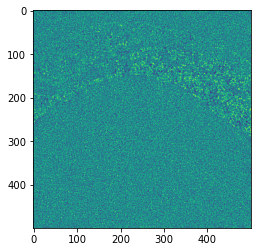

In [34]:
plt.imshow((slc_resc_1 + slc_resc_2))